# Pairwise registration 

The aim of this notebook is to showcase the implementation of the pairwise registration algorithm developed by [Arun et al., 1987](10.1109/TPAMI.1987.4767965), on least-Squares fitting of two 3-D point sets.

In [43]:
from base.pairwise_registration import pairwise_registration
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
source = np.loadtxt("sample_data/georef/MarkovSpodmol_ScanTargets.txt", 
                    skiprows=1, usecols=[1,2,3], delimiter=",")
target = np.loadtxt("sample_data/georef/MarkovSpodmol_StationCoords.txt",
                    skiprows=1, usecols=[1,2,3], delimiter=",")
# load the target labels
names = np.loadtxt("sample_data/georef/MarkovSpodmol_StationCoords.txt",
                    skiprows=1, usecols=[0], delimiter=",", dtype=str)

In [26]:
result = pairwise_registration(source, target, atol=0.3)

mean residual errors are within tolerance of 0.3!


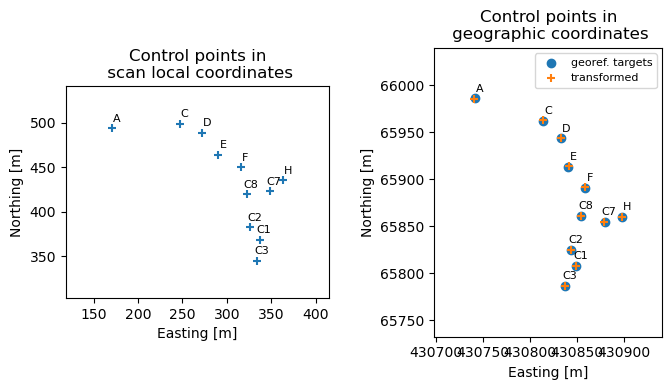

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

axes[0].scatter(*source[:,[0,1]].T, marker = "+")

for c, label in enumerate(names):
        axes[0].text(*(source[c, [0,1]]+5), label.strip("cible_"), fontsize = 8, va="bottom", ha="center")
        axes[1].text(*(target[c, [0,1]]+5), label.strip("cible_"), fontsize = 8, va="bottom", ha="center")

axes[1].scatter(*target[:,[0,1]].T, label="georef. targets")
axes[1].scatter(*result["P1_prime"][[0,1]], marker="+", label = "transformed")

for ax in axes:
    ylims = ax.get_ylim()
    yextent = ylims[1] - ylims[0]
    ax.set_ylim(ylims[0]-0.2*yextent, ylims[1]+0.2*yextent)

    xlims = ax.get_xlim()
    xextent = xlims[1] - xlims[0]
    ax.set_xlim(xlims[0]-0.2*xextent, xlims[1]+0.2*xextent)

    ax.set_aspect("equal")
    ax.set_xlabel("Easting [m]")
    ax.set_ylabel("Northing [m]")

axes[0].set_title("Control points in\n scan local coordinates")
axes[1].set_title("Control points in\n geographic coordinates")
axes[1].legend(fontsize=8)
plt.tight_layout()
plt.show()

The residual error in x, y, z after the rigid transformation are the following:

In [28]:
residuals = result["P1_prime"].T -target

The root mean square error after registration of the source points to the targets is the following

In [34]:
np.sqrt(np.mean(np.linalg.norm(residuals, axis=1)**2))

0.3119989594233872

The translation corresponds broadly to shifting the point cloud to its geographic coordinates:

In [35]:
result["T"]

array([[430398.61566872],
       [ 65590.75236516],
       [   554.33041506]])

The rotation matrix on the other hand is the following: 

In [36]:
result["R"]

array([[ 9.28419460e-01,  3.71533673e-01,  1.89200265e-04],
       [-3.71533375e-01,  9.28417776e-01,  1.83960890e-03],
       [ 5.07819763e-04, -1.77822291e-03,  9.99998290e-01]])

Here we can see that the rotation matrix has the approximate form of: 

$\begin{bmatrix}  cos(\theta)& -sin(\theta)&0 \\ sin(\theta)& cos(\theta)&0 \\ 0&0&1 \\ \end{bmatrix}$

In [54]:
print(f"rotation of {np.rad2deg(np.arccos(0.92842)):.0f} degrees")

rotation of 22 degrees


This corresponds to a 22° clockwise rotation around a vertical axis, which is what we expected from a scan where the horizontal inclination is well controlled. 